# Lasso

Lasso Regression is the name of the regression task employing an $L_1$-regularization term.

`````{admonition} Task (Lasso Regression)
:class: tip
**Given** a dataset of $n$ observations
\begin{equation*}\mathcal{D}=\left\{(\vvec{x}_i,y_i)\vert \vvec{x}_i\in\mathbb{R}^{d}, y_i\in\mathbb{R}, 1\leq i \leq n\right\},\end{equation*}  
the design matrix $X\in\mathbb{R}^{n\times p}$, where $X_{i\cdot}=\bm\phi(\vvec{x}_i)^\top$ and a regularization weight $\lambda>0$.      

**Find** the regression vector $\bm\beta$, solving the following objective
:::{math}
:label: eq:lasso_obj
\begin{align}
    \min_{\bm\beta\in\mathbb{R}^p} RSS_{L_1}(\bm\beta) &= \lVert \vvec{y}-X\bm\beta\rVert^2 +\lambda \lvert\bm{\beta}\rvert.
\end{align}
:::
**Return** the predictor function $f:\mathbb{R}^d\rightarrow\mathbb{R}$, $f(\vvec{x})=\bm\phi(\vvec{x})^\top\bm\beta$.
`````
The drawback of using a $L_1$-regularization term is that the resulting objective function in Eq. {eq}`eq:lasso_obj` is not differentiable if any value of $\beta$ is zero. However, we can generalize from the concept of a gradient to a subgradient, and the subgradient of the $L_1$-norm is given as follows:
\begin{align}
    \frac{\partial\lvert\bm\beta\rvert}{\partial \beta_k} \in 
    \begin{cases}
        \{1\},& \text{if } \beta_k>0\\
        \{-1\},& \text{if } \beta_k<0\\
        [-1,1],& \text{if } \beta_k = 0
    \end{cases}
\end{align}
We observe that the subgradient returns a set of values where $\beta_k=0$.
Minimizers of objective functions which have a subgradient satisfy $\vvec{0}\in\nabla f(\vvec{x})$ (FONC for subgradients).    

## Optimization
The FONC for subgradients would allow us in principle to find again the stationary points, that are also the minimizers of the Lasso task, because the Lasso objective is convex. Unfortunately, solving for the stationary points of the subgradient $\nabla RSS_{L_1}(\bm\beta)=0$ is too complicated (feel free to try it yourself). Yet, the function is simple enough to do the next best thing, which is coordinate descent. We derive the minimizers subject to one coordinate as stated in the following theorem.

`````{prf:theorem} Coordinate-wise Lasso Minimizers
The minimizer of Lasso subject to the coordinate $\beta_k$ 
$$\beta_k^* = \argmin_{\beta_k\in\mathbb{R}} \lVert\vvec{y}-X\bm\beta\rVert^2+\lambda\lvert\bm\beta\rvert$$
is given for $c_k =  X_{\cdot k}^\top \vvec{y}- \sum_{i\neq k}X_{\cdot k}^\top X_{\cdot i}\beta_i$ by
\begin{align}
\beta_k^*&= \begin{cases}
\frac{1}{\lVert X_{\cdot k}\rVert^2}(c_k -\lambda) & \text{if } c_k>\lambda\\
\frac{1}{\lVert X_{\cdot k}\rVert^2}(c_k +\lambda) & \text{if } c_k<-\lambda\\
0 & \text{if } -\lambda\leq c_k\leq \lambda.
\end{cases}
\end{align}
`````
````{toggle}
```{prf:proof}   
FONC for subgradients $\vvec{0}\in \frac{\partial }{\partial \beta_k}RSS_{L_1}$ yields the solutions to the coordinate-wise minimization problems.    
\begin{align}
\nabla RSS(\beta) &= 2X^\top(X\beta-\vvec{y})\\
\frac{\partial}{\partial \beta_k} RSS(\beta) &= 2X_{\cdot k}^\top(X\beta-\vvec{y})
\end{align}

\begin{align}
\frac{\partial}{\partial \beta_k} RSS_{L1}(\beta) = 2X_{\cdot k}^\top(X\beta-\vvec{y}) + \lambda\frac{\partial\lvert\beta\rvert}{\partial \beta_k}
\end{align}
We compute the stationary points and set $\frac{\partial}{\partial \beta_k} RSS_{L1}(\beta)=0$:
\begin{align}
&& 2X_{\cdot k}^\top(X\beta-\vvec{y}) + \lambda\frac{\partial\lvert\beta\rvert}{\partial \beta_k} = 0\\
&\Leftrightarrow\quad & 2X_{\cdot k}^\top X\beta - 2X_{\cdot k}^\top\vvec{y} + \lambda\frac{\partial\lvert\beta\rvert}{\partial \beta_k} = 0\\
&\Leftrightarrow & 2X_{\cdot k}^\top X\beta = 2X_{\cdot k}^\top\vvec{y} - \lambda\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\\
&\Leftrightarrow & X_{\cdot k}^\top X\beta = X_{\cdot k}^\top\vvec{y} - \frac \lambda 2\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\\
&\Leftrightarrow & X_{\cdot k}^\top \sum_{l} X_{\cdot l}\beta_l = X_{\cdot k}^\top\vvec{y} - \frac \lambda 2\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\\
&\Leftrightarrow & X_{\cdot k}^\top X_{\cdot k}\beta_k = - X_{\cdot k}^\top \sum_{l\neq k} X_{\cdot l}\beta_l + X_{\cdot k}^\top\vvec{y} - \frac \lambda 2\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\\
&\Leftrightarrow & \beta_k = \frac{1}{\lVert X_{\cdot k}\rVert^2}\left(X_{\cdot k}^\top\left(\vvec{y} -  \sum_{l\neq k} X_{\cdot l}\beta_l \right) - \frac \lambda 2\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\right)\\
&\Leftrightarrow & \beta_k = \frac{1}{\lVert X_{\cdot k}\rVert^2}\left(c_k - \frac \lambda 2\frac{\partial\lvert\beta\rvert}{\partial \beta_k}\right)\\
\end{align}
We have now a characterization of the minimizers of $\beta_k$ in dependence of the partial derivative of the $L_1$ norm. The term $c_k$ does not depend on the coordinate that we want to optimize, hence we can consider this term as a constant. The partial derivative depends on three cases: $\beta_k>0, \beta_k<0$ and $\beta_k=0$. We have a look at these cases now.

_case 1: $\beta_k>0$_    
If $\beta_k>0$, then the partial derivative is equal to $\frac{\partial\lvert\beta\rvert}{\partial \beta_k}=1$. That is, we have:
\begin{align}
&\Leftrightarrow& 0<\beta_k = \frac{1}{\lVert X_{\cdot k}\rVert^2}\left(c_k - \frac \lambda 2\cdot 1\right)\\
&\Leftrightarrow& 0<c_k - \frac \lambda 2\\
&\Leftrightarrow& \frac \lambda 2 < c_k 
\end{align}
Therewith we obtain the result that $\beta_k = \frac{1}{\lVert X_{\cdot k}\rVert^2}\left(c_k - \frac \lambda 2\right)$ if $c_k>\frac \lambda 2$.
```
````
Given these coordinate-wise minimizers for the Lasso objective, we can formulate the Lasso algorithm as follows.


```{prf:algorithm} Lasso

**Input**: $X,y,\lambda$
1. $\bm\beta\gets$ `Initialize`($p$)  
2. **while** not converged
    1. **for** $k\in\{1,\ldots, p\}$
    2. $c_k\gets X_{\cdot k}^\top (\vvec{y}- \sum_{i\neq k} X_{\cdot i}\beta_i)$
    3. $\beta_k\gets \begin{cases}
        \frac{1}{\lVert X_{\cdot k}\rVert^2}(c_k -\frac\lambda 2) & \text{if } c_k>\frac \lambda 2\\
        \frac{1}{\lVert X_{\cdot k}\rVert^2}(c_k +\frac\lambda 2) & \text{if } c_k<-\frac \lambda 2\\
        0 & \text{if } -\frac\lambda 2\leq c_k\leq \frac\lambda 2\end{cases}$
3. **return** $\bm\beta$ 
```
We can already see from the update rules that Lasso is more likely than Ridge Regression to perform feature selection, and to set some of the coordinates of $\bm\beta$ to zero. If a coordinate $\beta_k$ is in absolute values no larger than the regularization weight $\lambda$, then the coordinate is set to zero. Hence, the very small values (in absolute terms) observed from Ridge Regression can't happen for Lasso. The values of the Lasso regression vector $\bm\beta$ are either zero or at least as large as $\lamba$.

## Example
We use again the data from {prf:ref}`example_reg_p_larger_n`, but now we apply Lasso with varying regularization weights.

In [1]:
import numpy as np

D = np.array([5,3,1])
y = np.array([2,5,3])

We implement the Lasso method for a given design matrix $X$, target vector $\vvec{y}$, regularization weight $\lambda$ and a fixed number of coordinate descent steps $t_{max}$.  

In [2]:
def β_lasso(X,y,λ, t_max=1000):
    p=X.shape[1]
    β = np.random.rand(p)
    for t in range(t_max):
        for k in range(p):
            c_k = X[:,k].T@(y-X@β +X[:,k]*β[k])
            β[k] = np.sign(c_k)*np.maximum((np.abs(c_k)-λ/2),0)
            β[k] = β[k]/np.linalg.norm(X[:,k])**2
    return β

Now, we compute the Lasso regression functions for a centered target vector (as discussed in the previous section) and with varying regularization weights. 

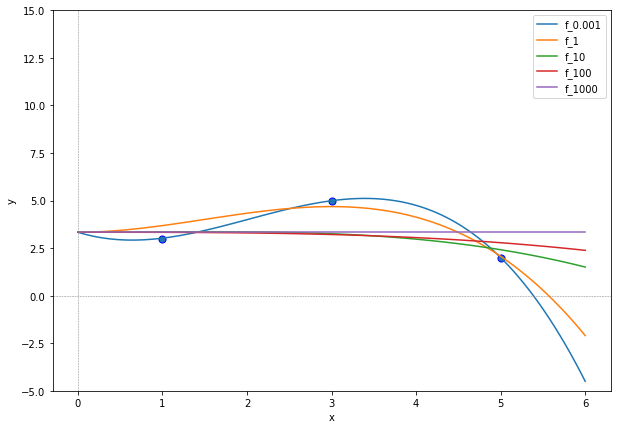

In [3]:
import matplotlib.pyplot as plt
def ϕ(x):
    return np.row_stack((x, x**2, x**3)) #exclude the bias term from the design matrix
X=ϕ(D).T

b=np.mean(y)
y_centered = y- b

plt.figure(figsize=(10, 7))
x = np.linspace(0, 6, 100)
for λ in [0.001,1,10, 100, 1000]:
    β = β_lasso(X, y_centered, λ, t_max=3000)
    f_x = ϕ(x).T@β + b
    plt.plot(x, f_x, label="f_"+str(λ))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-5, 15))
plt.axhline(0, linewidth=0.5, linestyle='--', color='gray') # horizontal lines
plt.axvline(0, linewidth=0.5, linestyle='--', color='gray') # vertical lines
plt.legend(loc="best")
plt.show()

If we compare these plots to the ones of Ridge Regression, then we observe that the regularization weight of Lasso has a bigger influence on the regression functions. For $\lambda\geq 10$, we obtain very flat approximations, whose graph does not decrease so rapidly for $x\rightarrow \infty$ as for  $\lambda\leq 1$. This effect is supported by the regression vector values, indicated below.

In [4]:
for λ in [0.001,1,10, 100, 1000]:
    β = β_lasso(X, y_centered, λ)
    print(λ,"\t",np.round(β,4))

0.001 	 [-0.3284  0.65   -0.1272]
1 	 [-0.      0.4504 -0.1002]
10 	 [ 0.      0.0334 -0.014 ]
100 	 [ 0.     -0.     -0.0044]
1000 	 [-0. -0. -0.]


Already for $\lambda=1$ the first feature of the design matrix is deemed irrelevant for the Lasso regression task. For $\lambda=100$ only one of the three features (the bias term is here excluded) are still used and for $\lambda=1000$ we obtain a constant regression function. 